# Appendix

## Set the kernel

In [2]:
import pandas as pd
import glob
import geopy.distance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [29]:
# The function below will be used to generate a independent variable within our regression models
# This variable will be distance to the city center

def geopydist2(df,coords_1):
    ''' This function will take a dataframe with geo-coords and compute the distance to 
        a given set of geo-coords labled in the function as coords_1'''
    distances=[]
    for i in range(len(df)):
        coords_2 = (df['latitude'][i],df['longitude'][i])
        
        try:
            distances.append(geopy.distance.vincenty(coords_1, coords_2).km)
        except: 
            print('ERROR')
    return distances

## Variables

In [15]:
########################################
############# Airbnb data ##############
########################################

# London Airbnb data from Inside Airbnb
Ldn_Abnb = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Data/London_October.csv')

# Get not null postcodes 
# # null = 1931
Abnb_pcode = Ldn_Abnb[Ldn_Abnb['zipcode'].isnull()==False]

# # Format postcode column to just districts
Abnb_pcode['zipcode'] = Abnb_pcode['zipcode'].apply(lambda x: (x.split(' ')[0]))
Abnb_pcode['zipcode'] = Abnb_pcode['zipcode'].apply(lambda x: x[:-3] if len(x)>4 else x)
Abnb_df = pd.DataFrame([Abnb_pcode['zipcode'],Abnb_pcode['number_of_reviews']]).T

# Import list of inner london postcode districts
Inner_Ldn_districts = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Postcode_districtsv3.csv')

# Keep only inner london postcode districts
Inner_Ldn_districts = Inner_Ldn_districts['London_Districts']

# Remove E20 as not in 2011 Census data
Inner_Ldn_districts = (Inner_Ldn_districts.drop(index = 18)).reset_index()
Inner_Ldn_districts = Inner_Ldn_districts.drop('index',axis =1)

# Airbnbs in inner london
Abnb_df_Ldn = Abnb_df[Abnb_df['zipcode'].isin(Inner_Ldn_districts['London_Districts'])]

### Number of reviews by zipcode
Review_by_district = Abnb_df_Ldn.groupby('zipcode')['number_of_reviews'].sum().reset_index()

# Listings by district

Listings_by_district = Abnb_df_Ldn.groupby('zipcode').count()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
Listings_by_district.var()

number_of_reviews    231099.040022
dtype: float64

In [17]:
Listings_by_district.head()

,number_of_reviews
zipcode,
E1,2831
E10,257
E11,307
E12,95
E13,176


In [18]:
Listings_by_district.describe()

,number_of_reviews
count,154.000000
mean,420.746753
std,480.727615
min,8.000000
25%,99.250000
50%,239.500000
75%,574.250000
max,2831.000000


In [282]:
Listings_by_district[Listings_by_district['number_of_reviews']<= 100]

,number_of_reviews
zipcode,
E12,95
E18,63
E4,84
EC1A,41
EC1M,99
EC1N,91
EC1Y,93
EC2Y,19
EC3R,28


In [273]:
Listings_by_district_Graph.columns = ['Number of Airbnbs']

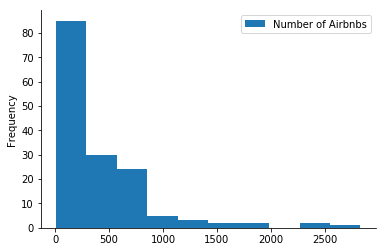

In [279]:
Listings_by_district_Graph.plot.hist()
sns.despine()
plt.savefig('Listings_dist.png')


In [ ]:
savefig('foo.png')

In [ ]:
sns_plot.savefig('output.png')

In [270]:
Listings_by_district.to_csv('listings.csv')

In [30]:
########################################
########### Distances in km ############
########################################

# Import postcode district centroid data (from FreeMapTools.com)
postcode_districts = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Data/District/CSV/postcode_district_centroid.csv')

# # Import list of inner london postcode districts
# Inner_Ldn_districts = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Postcode_districtsv3.csv')

# # Keep only inner london postcode districts
# Inner_Ldn_districts = Inner_Ldn_districts['London_Districts']

# # Remove E20 as not in 2011 Census data
# Inner_Ldn_districts = (Inner_Ldn_districts.drop(index = 18)).reset_index()
# Inner_Ldn_districts = Inner_Ldn_districts.drop('index',axis =1)

Inner_Ldn_geocoords = postcode_districts[postcode_districts['postcode'].isin(Inner_Ldn_districts['London_Districts'])]
Inner_Ldn_geocoords = Inner_Ldn_geocoords.reset_index()


# True Geographical Centre of London
LONDON = (51.5104,0.1156)

# Calculate distance in km to each district
distances = geopydist2(Inner_Ldn_geocoords,LONDON)
Inner_Ldn_geocoords['Distances'] = distances
distances = Inner_Ldn_geocoords.drop(['index','id','latitude','longitude'],axis = 1)

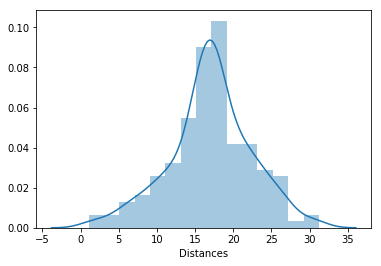

In [32]:
sns.distplot(distances['Distances'])

In [71]:
########################################
############## Age 24-34 ###############
########################################

# Import Age
Age = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Data/District/CSV/nomis_Age.csv')

# Filter for only inner london districts
Age = Age[Age['postcode districts'].isin(Inner_Ldn_districts['London_Districts'])]

# # Get sum of Young ages
Age['Age 20 to 29'] = Age['Age 20 to 24'] + Age['Age 25 to 29']
Age = Age.drop(['Age 20 to 24','Age 25 to 29'],axis = 1)
Age = Age[['postcode districts', 'Age 20 to 29']]

In [72]:
Age.describe()

,Age 20 to 29
count,154.000000
mean,6382.123377
std,5392.013785
min,41.000000
25%,1721.750000
50%,5045.500000
75%,9686.250000
max,23384.000000


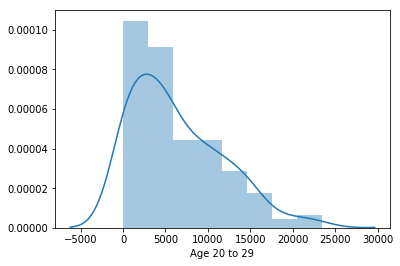

In [75]:
sns.distplot(Age['Age 20 to 29'])

In [67]:
########################################
############## Bohemian ################
########################################

# Import Bohemian
Bohemian = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Data/District/CSV/nomis_Bohemian.csv')

# Filter for only inner london districts
Bohemian = Bohemian[Bohemian['postcode districts'].isin(Inner_Ldn_districts['London_Districts'])]

In [68]:
Bohemian = Bohemian[['postcode districts','Number_of_Bohemian']]

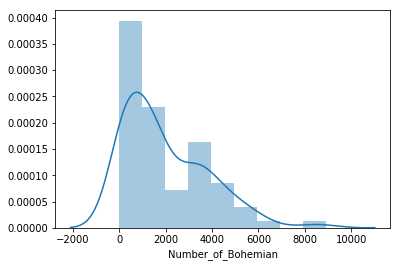

In [78]:
sns.distplot(Bohemian['Number_of_Bohemian'])

In [77]:
Bohemian.describe()

,Number_of_Bohemian
count,154.000000
mean,1995.448052
std,1816.175239
min,4.000000
25%,503.250000
50%,1491.000000
75%,3241.500000
max,8905.000000


In [81]:
########################################
############ Unemployment ##############
########################################

# Import Bohemian
Unemployment = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Data/District/CSV/nomis_EconomicActivity.csv')

# Filter for only london districts
Unemployment = Unemployment[Unemployment['postcode districts'].isin(Inner_Ldn_districts['London_Districts'])]

# Get only relevant data
Unemployment = Unemployment[['postcode districts','Economically active: Unemployed']]

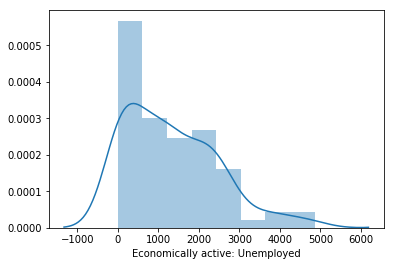

In [83]:
sns.distplot(Unemployment['Economically active: Unemployed'])

In [84]:
Unemployment.describe()

,Economically active: Unemployed
count,154.000000
mean,1327.883117
std,1146.200800
min,4.000000
25%,294.750000
50%,1153.500000
75%,2110.750000
max,4856.000000


In [85]:
########################################
################ Race ##################
########################################

# Import Race
Race = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Data/District/CSV/nomis_EthnicGroup.csv')

# Filter for only london districts
Race = Race[Race['postcode districts'].isin(Inner_Ldn_districts['London_Districts'])]

# Get relevant variables 
Race = Race[['postcode districts','White','Mixed/multiple ethnic groups','Asian/Asian British','Black/African/Caribbean/Black British','Other ethnic group']]

# # Create dummy variables 
Race_test = Race[['White','Mixed/multiple ethnic groups','Asian/Asian British','Black/African/Caribbean/Black British','Other ethnic group']]
Race2 = Race[['postcode districts']]
greatest = Race_test.idxmax(axis=1)
Race_test['Greatest'] = greatest
test = pd.get_dummies(Race_test['Greatest'])
Race = pd.concat([Race2, test],axis = 1)

In [86]:
display(greatest.groupby(greatest).count())

Asian/Asian British                        6
Black/African/Caribbean/Black British      1
White                                    147
dtype: int64

In [88]:
########################################
########### Qualifications #############
########################################

# Import qualifications
Qualification = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Data/District/CSV/nomis_Qualification.csv')

# Filter for only london districts
Qualification = Qualification[Qualification['postcode districts'].isin(Inner_Ldn_districts['London_Districts'])]

# Get relevant variables 
Qualification = Qualification[['postcode districts','Highest level of qualification: Level 4 qualifications and above']]

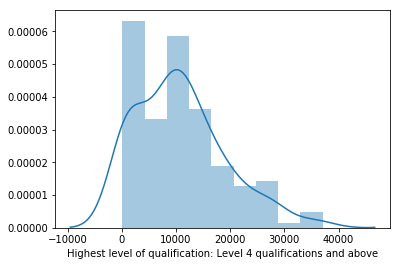

In [91]:
sns.distplot(Qualification['Highest level of qualification: Level 4 qualifications and above'])

In [ ]:
Qualification.describe()

In [140]:
########################################
############# Population ###############
########################################

# Import population
Population = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Data/District/CSV/nomis_Population.csv')

# Filter for only london districts
Population = Population[Population['postcode districts'].isin(Inner_Ldn_districts['London_Districts'])]

# Format
Population['Population'] = Population['Population'].apply(lambda x: int(x))

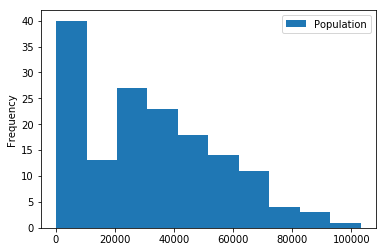

In [217]:
Population.plot.hist()

In [ ]:
########################################
############### Relgion ################
########################################

## optional 

# Import religion
Religion = pd.read_csv('/Users/JoshWoodbridge/Documents/University/Oxford/Study/Michaelmas_Term/Applied_Stats/Project/Data/District/CSV/nomis_Religion.csv')

# Filter for only london districts
Religion = Religion[Religion['postcode districts'].isin(Inner_Ldn_districts['London_Districts'])]

# Get relevant variables 
# Religion = Religion[['postcode districts','Pecentage of level 4+']]

In [ ]:
Religion_test = Religion[['Has religion','Christian','Buddhist','Hindu','Jewish','Muslim','Sikh','Other religion','No religion','Religion not stated']]

In [ ]:
greatest = Religion_test.idxmax(axis=1)

## Merge variables

In [141]:
# Add distance to center to number of listings 
df1 = Listings_by_district.merge(distances,right_on ='postcode',left_index = True, how = 'inner') 
df1 = df1.rename(index=str, columns={"number_of_reviews": "Listings"})

# Add Age (young)
df2 = df1.merge(Age,left_on = 'postcode',right_on = 'postcode districts',how = 'inner')

# Add Bohemian
df3 = df2.merge(Bohemian, left_on = 'postcode',right_on = 'postcode districts',how = 'inner')

# Add Unemployment
df4 = df3.merge(Unemployment, left_on = 'postcode', right_on = 'postcode districts', how = 'inner')

# format
df4 = df4.drop(['postcode districts_x','postcode districts_y','postcode districts'],axis =1)

# Add Race
df5 = df4.merge(Race, left_on = 'postcode', right_on = 'postcode districts', how = 'inner')

# Add Qualifications
df6 = df5.merge(Qualification, left_on = 'postcode', right_on = 'postcode districts', how = 'inner')

# Add Population
df7 = df6.merge(Population, left_on = 'postcode', right_on = 'postcode districts', how = 'inner')


# format
df7 = df7.drop(['postcode districts_x','postcode districts_y','postcode districts'],axis =1)
df7 = df7.rename(index = str, columns = {'Number_of_Bohemian': 'Bohemian'})
df7 = df7.rename(index = str, columns = {'Highest level of qualification: Level 4 qualifications and above': 'Qualification'})
df7 = df7.rename(index = str, columns = {'Black/African/Caribbean/Black British': 'Black'})
df7 = df7.rename(index = str, columns = {'Asian/Asian British': 'Asian'})
df7 = df7.rename(index = str, columns = {'Economically active: Unemployed': 'Unemployed'})
df7 = df7.rename(index = str, columns = {'Age 20 to 29': 'Young'})

In [143]:
import pickle 
filename = 'censusdf'
outfile = open(filename,'wb')
pickle.dump(df7,outfile)
outfile.close()

In [154]:
df7.head()

,Listings,postcode,Distances,Young,Bohemian,Unemployed,Asian,Black,White,Qualification,Population
0,2831,E1,12.106606,21475.0,3865.0,3702.0,1,0,0,20771.0,70389
1,257,E10,10.911819,9275.0,1090.0,2112.0,0,0,1,9955.0,43120
2,307,E11,9.481475,11110.0,2483.0,2442.0,0,0,1,17597.0,54689
3,95,E12,6.130452,9206.0,530.0,2127.0,1,0,0,9535.0,42606
4,176,E13,6.417922,10310.0,521.0,2573.0,1,0,0,9719.0,47169


## Models

In [101]:
#########################################
#### Multivariate, linear, no control ###
#########################################

r = smf.ols('Listings ~ Bohemian', data = df7).fit()
print(r.summary())


                            OLS Regression Results                            
Dep. Variable:               Listings   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     153.6
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           8.11e-25
Time:                        12:16:50   Log-Likelihood:                -1115.2
No. Observations:                 154   AIC:                             2234.
Df Residuals:                     152   BIC:                             2241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3108     40.797      1.135      0.2

In [220]:
#########################################
#### Multivariate, linear, controls #####
#########################################

q = smf.ols('Listings ~ Bohemian+Distances+Young+Unemployed+Asian+Black+Qualification+Population', data = df7).fit()
print(q.summary())
# print(q.fittedvalues)


                            OLS Regression Results                            
Dep. Variable:               Listings   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     48.23
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           3.71e-37
Time:                        16:59:50   Log-Likelihood:                -1069.1
No. Observations:                 154   AIC:                             2156.
Df Residuals:                     145   BIC:                             2184.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -33.1686     85.521     -0.388

In [206]:
df7.head()

,Listings,postcode,Distances,Young,Bohemian,Unemployed,Asian,Black,White,Qualification,Population
0,2831,E1,12.106606,21475.0,3865.0,3702.0,1,0,0,20771.0,70389
1,257,E10,10.911819,9275.0,1090.0,2112.0,0,0,1,9955.0,43120
2,307,E11,9.481475,11110.0,2483.0,2442.0,0,0,1,17597.0,54689
3,95,E12,6.130452,9206.0,530.0,2127.0,1,0,0,9535.0,42606
4,176,E13,6.417922,10310.0,521.0,2573.0,1,0,0,9719.0,47169


In [209]:
#########################################
##### Multivariate log transformed ######
#########################################
import math
# take log of appropriate varialbes 

log_df7 = df7.copy(deep=True)

In [210]:
log_df7['Listings'] = log_df7['Listings'].apply(lambda x: math.log10(x))

In [212]:
log_df7['Young'] = log_df7['Young'].apply(lambda x: math.log10(x))

In [213]:
log_df7['Bohemian'] = log_df7['Bohemian'].apply(lambda x: math.log10(x))

In [214]:
log_df7['Qualification'] = log_df7['Qualification'].apply(lambda x: math.log10(x))

In [215]:
log_df7['Unemployed'] = log_df7['Unemployed'].apply(lambda x: math.log10(x))

In [218]:
log_df7['Population'] = log_df7['Population'].apply(lambda x: math.log10(x))

In [264]:
# fit model and show summary
r = smf.ols('Listings ~ Bohemian+Distances+Young+Unemployed+Asian+Black+Qualification+Population', data = log_df7).fit()
print(r.summary())
# print(r.resid)
# print(q.fittedvalues)


                            OLS Regression Results                            
Dep. Variable:               Listings   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     62.97
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           2.17e-43
Time:                        15:32:09   Log-Likelihood:                0.27460
No. Observations:                 154   AIC:                             17.45
Df Residuals:                     145   BIC:                             44.78
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.0507      0.385      5.330

In [284]:
log_df7.head()

,Listings,postcode,Distances,Young,Bohemian,Unemployed,Asian,Black,White,Qualification,Population
0,3.451940,E1,12.106606,4.331933,3.587149,3.568436,1,0,0,4.317457,4.847505
1,2.409933,E10,10.911819,3.967314,3.037426,3.324694,0,0,1,3.998041,4.634679
2,2.487138,E11,9.481475,4.045714,3.394977,3.387746,0,0,1,4.245439,4.737900
3,1.977724,E12,6.130452,3.964071,2.724276,3.327767,1,0,0,3.979321,4.629471
4,2.245513,E13,6.417922,4.013259,2.716838,3.410440,1,0,0,3.987622,4.673657


In [223]:
ols_log_resid = r.fittedvalues

In [286]:
testdf = log_df7.drop('postcode', axis = 1)

In [290]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [370]:
### test for multicollianearity on raw data
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('Listings ~ Bohemian+Distances+Young+Unemployed+Asian+Black+Qualification+Population', df7, return_type='dataframe')



In [371]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [372]:
vif.round(1)

,VIF Factor,features
0,16.9,Intercept
1,6.2,Bohemian
2,1.6,Distances
3,22.2,Young
4,39.0,Unemployed
5,1.4,Asian
6,1.1,Black
7,38.8,Qualification
8,58.1,Population


In [315]:
df7.head()

,Listings,postcode,Distances,Young,Bohemian,Unemployed,Asian,Black,White,Qualification,Population
0,2831,E1,12.106606,21475.0,3865.0,3702.0,1,0,0,20771.0,70389
1,257,E10,10.911819,9275.0,1090.0,2112.0,0,0,1,9955.0,43120
2,307,E11,9.481475,11110.0,2483.0,2442.0,0,0,1,17597.0,54689
3,95,E12,6.130452,9206.0,530.0,2127.0,1,0,0,9535.0,42606
4,176,E13,6.417922,10310.0,521.0,2573.0,1,0,0,9719.0,47169


In [314]:
log_df7.head()

,Listings,postcode,Distances,Young,Bohemian,Unemployed,Asian,Black,White,Qualification,Population
0,3.451940,E1,12.106606,4.331933,3.587149,3.568436,1,0,0,4.317457,4.847505
1,2.409933,E10,10.911819,3.967314,3.037426,3.324694,0,0,1,3.998041,4.634679
2,2.487138,E11,9.481475,4.045714,3.394977,3.387746,0,0,1,4.245439,4.737900
3,1.977724,E12,6.130452,3.964071,2.724276,3.327767,1,0,0,3.979321,4.629471
4,2.245513,E13,6.417922,4.013259,2.716838,3.410440,1,0,0,3.987622,4.673657


In [318]:
df7_log_count.head()

,Listings,postcode,Distances,Young,Bohemian,Unemployed,Asian,Black,White,Qualification,Population
0,2831,E1,12.106606,4.331933,3.587149,3.568436,1,0,0,4.317457,4.847505
1,257,E10,10.911819,3.967314,3.037426,3.324694,0,0,1,3.998041,4.634679
2,307,E11,9.481475,4.045714,3.394977,3.387746,0,0,1,4.245439,4.737900
3,95,E12,6.130452,3.964071,2.724276,3.327767,1,0,0,3.979321,4.629471
4,176,E13,6.417922,4.013259,2.716838,3.410440,1,0,0,3.987622,4.673657


In [317]:
#########################################
############### Poisson #################
#########################################

### log skewed data for poisson and negative binomial

df7_log_count = df7.copy(deep=True)

df7_log_count['Young'] = df7_log_count['Young'].apply(lambda x: math.log10(x))
df7_log_count['Bohemian'] = df7_log_count['Bohemian'].apply(lambda x: math.log10(x))
df7_log_count['Population'] = df7_log_count['Population'].apply(lambda x: math.log10(x))
df7_log_count['Qualification'] = df7_log_count['Qualification'].apply(lambda x: math.log10(x))
df7_log_count['Unemployed'] = df7_log_count['Unemployed'].apply(lambda x: math.log10(x))

In [328]:
### run model

from patsy import dmatrices
import statsmodels.api as sm

formula = "Listings ~ Bohemian+Distances+Young+Unemployed+Black+Asian+Qualification+Population"
response, predictors = dmatrices(formula, df7_log_count, return_type='dataframe')
po_results = sm.GLM(response, predictors, family=sm.families.Poisson()).fit()
print(po_results.summary())
# print(po_results.fittedvalues)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Listings   No. Observations:                  154
Model:                            GLM   Df Residuals:                      145
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7278.5
Date:                Mon, 17 Dec 2018   Deviance:                       13434.
Time:                        14:42:02   Pearson chi2:                 1.44e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3964      0.109     40.182      0.000       4.182       4.611
Bohemian          0.9896      0.030     33.

In [352]:
print(pearsonr(po_results.fittedvalues,df7['Listings']))

(0.8601263985966683, 2.728347194162958e-46)


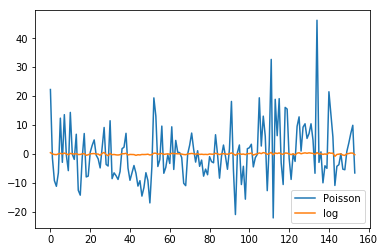

In [320]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df7['Listings']))
# plt.plot(x, q.resid, label = 'OLS')
plt.plot(x, po_results.resid_pearson, label = 'Poisson')
plt.plot(x, r.resid, label = 'log')
plt.legend(loc='lower right')
plt.show()

In [324]:
#########################################
####### Negative binomial ###############
#########################################

formula = "Listings ~ Bohemian+Distances+Young+Unemployed+Black+Asian+Qualification+Population"
response, predictors = dmatrices(formula, df7_log_count, return_type='dataframe')
nb_results = sm.GLM(response, predictors, family=sm.families.NegativeBinomial()).fit()
print(nb_results.summary())
# print(po_results.fittedvalues)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Listings   No. Observations:                  154
Model:                            GLM   Df Residuals:                      145
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1016.6
Date:                Mon, 17 Dec 2018   Deviance:                       44.266
Time:                        14:14:47   Pearson chi2:                     42.5
No. Iterations:                     9   Covariance Type:             nonrobust
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0356      1.554      3.240      0.001       1.989       8.082
Bohemian          0.9963      0.479      2.

In [347]:
nb_results.fittedvalues.head()

0    1200.271832
1     265.170394
2     505.988748
3     190.752471
4     189.596501
dtype: float64

In [349]:
df7['Listings'].head()

0    2831
1     257
2     307
3      95
4     176
Name: Listings, dtype: int64

In [351]:
from scipy.stats import pearsonr
print(pearsonr(nb_results.fittedvalues,df7['Listings']))

(0.8312894249978171, 1.3232626244497841e-40)


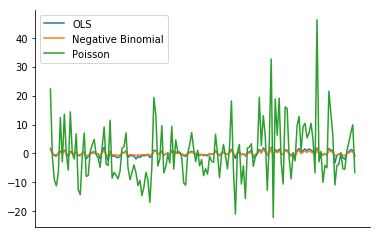

In [358]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df7['Listings']))
# plt.plot(x, ols_resid, label = 'OLS')
plt.plot(x, r.resid_pearson, label = 'OLS')
plt.plot(x, nb_results.resid_pearson, label = 'Negative Binomial')
plt.plot(x, po_results.resid_pearson, label = 'Poisson')
plt.legend(loc='upper left')
sns.despine()
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.savefig('All_models_resid.png')
plt.show()

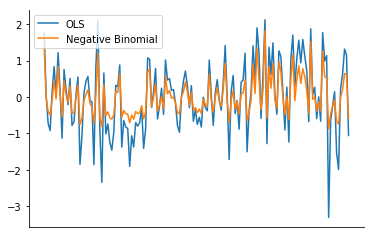

In [357]:
x = np.arange(len(df7['Listings']))
# plt.plot(x, ols_resid, label = 'OLS')
plt.plot(x, r.resid_pearson, label = 'OLS')
plt.plot(x, nb_results.resid_pearson, label = 'Negative Binomial')
# plt.plot(x, po_results.resid_pearson, label = 'Poisson')
plt.legend(loc='upper left')
sns.despine()
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.savefig('2_models_resid.png')
plt.show()

In [343]:
nb_results.resid_pearson.var()

0.27807981625859757